# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [2]:
df=pd.read_csv("../data/checker_submits.csv")

In [3]:
df

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104
...,...,...,...,...
1681,user_19,laba06s,9,2020-05-21 20:01:48.959966
1682,user_1,laba06s,6,2020-05-21 20:18:54.487900
1683,user_1,laba06s,7,2020-05-21 20:19:06.872761
1684,user_1,laba06s,8,2020-05-21 20:22:41.877806


In [4]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek

df = df[['uid', 'labname', 'numTrials', 'hour', 'dayofweek']]

In [5]:
encoder = OneHotEncoder(sparse_output=False)
categorical_features = df[['uid', 'labname']]
encoded_categorical = encoder.fit_transform(categorical_features)

In [6]:
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_features.columns))

In [7]:
encoded_df

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
scaler = StandardScaler()
continuous_features = df[['numTrials', 'hour']]
scaled_continuous = scaler.fit_transform(continuous_features)
scaled_df = pd.DataFrame(scaled_continuous, columns=['numTrials', 'hour'])

In [9]:
final_df = pd.concat([encoded_df, scaled_df, df['dayofweek']], axis=1)

In [10]:
final_df

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1,numTrials,hour,dayofweek
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.788667,-2.562352,4
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.756764,-2.562352,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.724861,-2.562352,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.692958,-2.562352,4
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.661055,-2.562352,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.533442,0.945382,3
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.629151,0.945382,3
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.597248,0.945382,3
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.565345,0.945382,3


In [23]:
final_df.to_csv("../data/dayofweek.csv", index=False)

In [24]:
y = final_df['dayofweek']
most_pop = np.array([np.argmax(np.bincount(y))] * len(y))
accuracy_score(y, most_pop)

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [25]:
X = final_df.drop('dayofweek', axis=1)
y = final_df['dayofweek']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lg = LogisticRegression(random_state=21, fit_intercept=False, solver='liblinear')
lg.fit(X_train, y_train)

/mnt/c/Users/dolgu/DS_Bootcamp.Team00.ID_886515-Team_TL_jeanetro.cafc50fc_3538_4009-1/src/duckfiev/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,False
,intercept_scaling,1
,class_weight,None
,random_state,21
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


In [26]:
y_pred = lg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели логистической регрессии: {accuracy:.2f}")

Точность модели логистической регрессии: 0.60


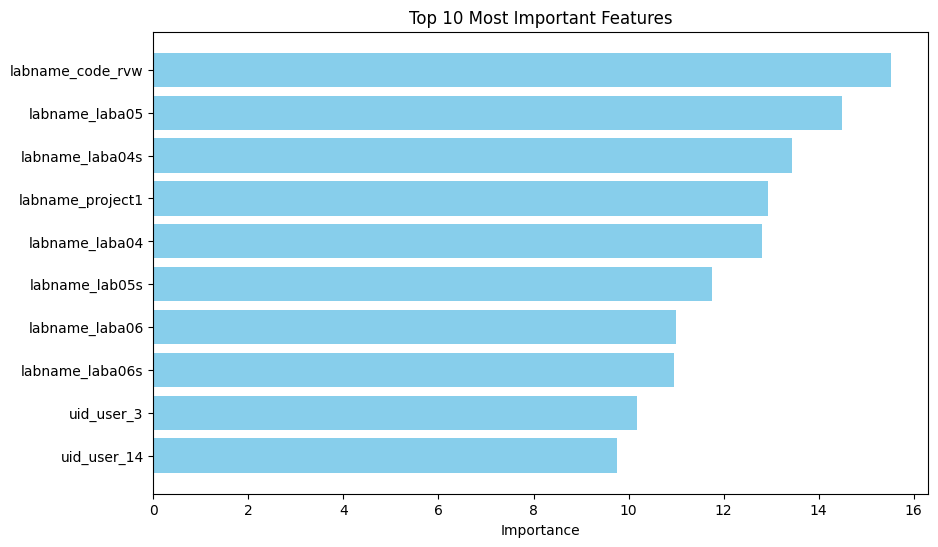

In [27]:
def plot_feature_importance(coef, feature_names, top_n=10):
    importance = np.sum(np.abs(coef), axis=0)
    
    indices = np.argsort(importance)[-top_n:][::-1]
    
    top_features = [feature_names[i] for i in indices]
    top_importance = importance[indices]

    plt.figure(figsize=(10, 6))
    plt.barh(top_features, top_importance, color='skyblue')
    plt.xlabel('Importance')
    plt.title(f'Top {top_n} Most Important Features')
    plt.gca().invert_yaxis()
    plt.show()

plot_feature_importance(lg.coef_, X.columns, top_n=10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [28]:
svc = SVC(probability=True, random_state=21, kernel='linear')
svc.fit(X, y)
y_pred_base = svc.predict(X)
accuracy_base = accuracy_score(y, y_pred_base)
accuracy_base 

0.702846975088968

In [29]:
svc_linear = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21))
svc_linear.fit(X, y)

y_pred_linear = svc_linear.predict(X)
accuracy_linear = accuracy_score(y, y_pred_linear)
accuracy_linear

0.6120996441281139

In [30]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_accuracy = 0
best_kernel = None

for kernel in kernels:
    svc = SVC(probability=True, random_state=21, kernel=kernel)
    svc.fit(X, y)
    y_pred = svc.predict(X)
    accuracy = accuracy_score(y, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel

print(f'Лучшее ядро: {best_kernel} с точностью: {best_accuracy:.4f}')

Лучшее ядро: poly с точностью: 0.8594


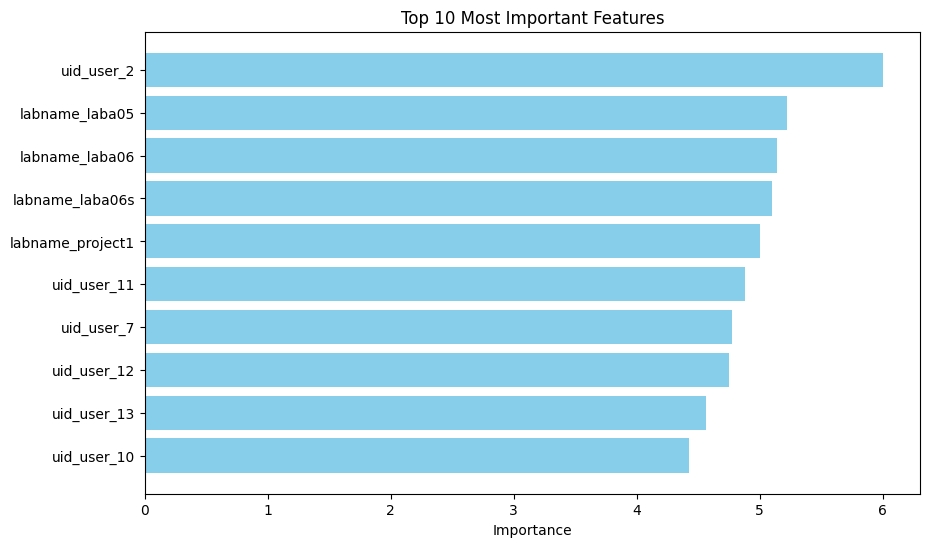

In [31]:
feature_importance = np.sum(np.abs([clf.coef_ for clf in svc_linear.estimators_]), axis=0)
plot_feature_importance(feature_importance, X.columns, top_n=10)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [32]:
dt = DecisionTreeClassifier(max_depth=4, random_state=21)
dt.fit(X, y)

y_pred_dt = dt.predict(X)
accuracy_dt = accuracy_score(y, y_pred_dt)
accuracy_dt

0.5516014234875445

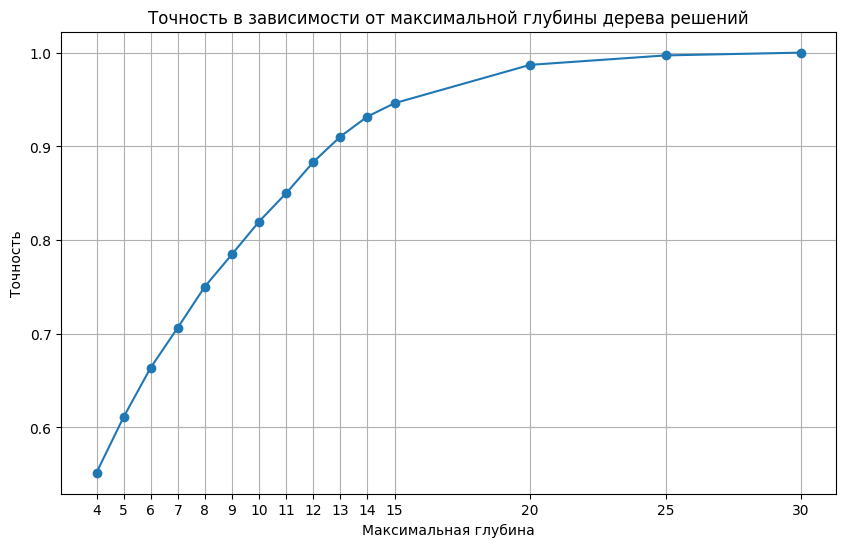

In [33]:
max_depths = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 25, 30]
accuracies = []

for depth in max_depths:
    dtc = DecisionTreeClassifier(max_depth=depth, random_state=21)
    dtc.fit(X, y)
    pred_dt = dtc.predict(X)
    accuracies.append(accuracy_score(y, pred_dt))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracies, marker='o')
plt.title('Точность в зависимости от максимальной глубины дерева решений')
plt.xlabel('Максимальная глубина')
plt.ylabel('Точность')
plt.xticks(max_depths)
plt.grid()
plt.show()

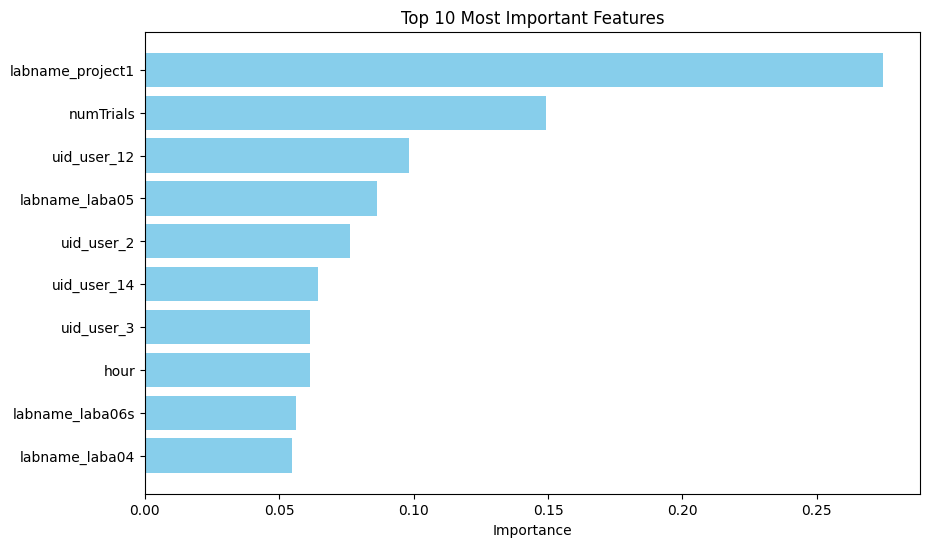

In [34]:
plot_feature_importance(dt.feature_importances_.reshape(1, -1), X.columns, top_n=10)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [35]:
rf = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
rf.fit(X, y)

y_pred_rf = rf.predict(X)
accuracy_rf = accuracy_score(y, y_pred_rf)
accuracy_rf

0.9988137603795967

In [36]:
max_depth_v = [None, 5, 10, 15, 20, 25]
n_est_v = [10, 50, 100, 200]
accuracies = {}

for max_depth in max_depth_v:
    for n_estimators in n_est_v:
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=21)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[(n_estimators, max_depth)] = accuracy
        print(f"Точность модели случайного леса с n_estimators={n_estimators} и max_depth={max_depth}: {accuracy:.2f}")

Точность модели случайного леса с n_estimators=10 и max_depth=None: 0.90
Точность модели случайного леса с n_estimators=50 и max_depth=None: 0.91
Точность модели случайного леса с n_estimators=100 и max_depth=None: 0.91
Точность модели случайного леса с n_estimators=200 и max_depth=None: 0.91
Точность модели случайного леса с n_estimators=10 и max_depth=5: 0.59
Точность модели случайного леса с n_estimators=50 и max_depth=5: 0.59
Точность модели случайного леса с n_estimators=100 и max_depth=5: 0.56
Точность модели случайного леса с n_estimators=200 и max_depth=5: 0.56
Точность модели случайного леса с n_estimators=10 и max_depth=10: 0.79
Точность модели случайного леса с n_estimators=50 и max_depth=10: 0.79
Точность модели случайного леса с n_estimators=100 и max_depth=10: 0.80
Точность модели случайного леса с n_estimators=200 и max_depth=10: 0.80
Точность модели случайного леса с n_estimators=10 и max_depth=15: 0.85
Точность модели случайного леса с n_estimators=50 и max_depth=15: 0

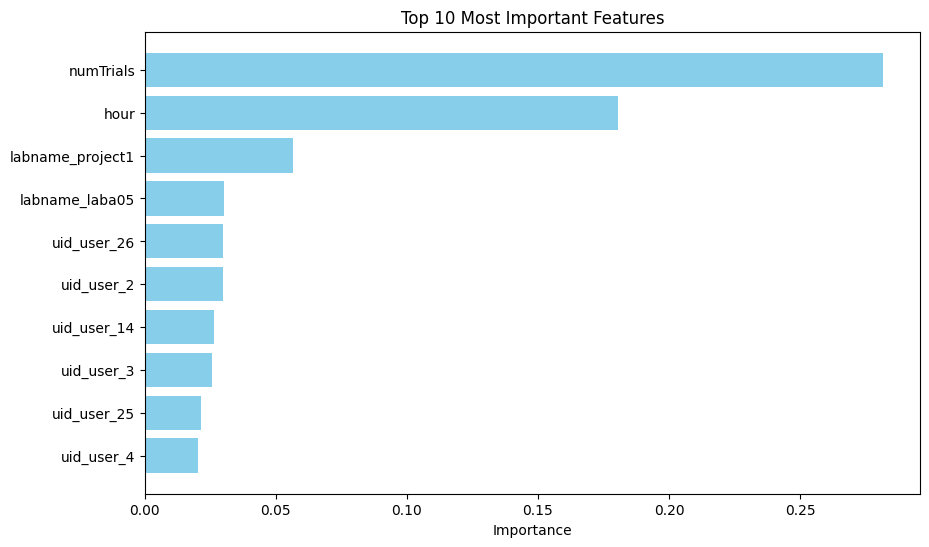

In [37]:
plot_feature_importance(rf.feature_importances_.reshape(1, -1), X.columns, top_n=10)